# Упражнение 6 (ИЗ 3.3)

# Bonus Track

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/a11f0b9cb0074fdacc112eee71eb0b67/asset-v1:ITMOUniversity+bonus_track_3+spring_2023+type@asset+block/candy-data.csv', index_col = 'competitorname')
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1


In [ ]:
df = df.drop(['Candy Corn', 'Nerds', 'Reeses stuffed with pieces'])

In [ ]:
X = df.drop(['Y', 'winpercent'], axis=1)
y = df['Y']

In [ ]:
df_test = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/d53b0f8b959d03cc84a992f6070cabc6/asset-v1:ITMOUniversity+bonus_track_3+spring_2023+type@asset+block/candy-test.csv')
df_test.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,Y
0,Sugar Babies,0,1,1,0,0,0,1,0,1,0.647364,0.7670,0
1,Sugar Daddy,1,0,0,0,1,0,1,0,0,0.418000,0.3250,0
2,Super Bubble,0,1,0,0,0,0,0,0,0,0.162000,0.1160,0
3,Swedish Fish,0,1,0,0,0,0,0,0,1,0.604000,0.7550,1
4,Tootsie Pop,1,0,0,0,0,0,0,0,0,0.876560,0.5654,1


In [ ]:
X_test = df_test.drop(['Y', 'competitorname'], axis=1)

In [ ]:
logr = LogisticRegression(random_state = 2019, solver = 'lbfgs')
logr.fit(X, y)
winpercent_pred = logr.predict_proba(X_test)[:, 1]

In [ ]:
df_test['winpercent'] = winpercent_pred

In [ ]:
df_test[df_test['competitorname'].isin(['Tootsie Roll Juniors', 'Swedish Fish'])]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,Y,winpercent
3,Swedish Fish,0,1,0,0,0,0,0,0,1,0.604,0.755,1,0.369341
5,Tootsie Roll Juniors,1,0,0,0,0,0,0,0,0,0.313,0.511,0,0.689122


In [ ]:
df_test.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,Y,winpercent
0,Sugar Babies,0,1,1,0,0,0,1,0,1,0.647364,0.7670,0,0.211346
1,Sugar Daddy,1,0,0,0,1,0,1,0,0,0.418000,0.3250,0,0.287900
2,Super Bubble,0,1,0,0,0,0,0,0,0,0.162000,0.1160,0,0.340501
3,Swedish Fish,0,1,0,0,0,0,0,0,1,0.604000,0.7550,1,0.369341
4,Tootsie Pop,1,0,0,0,0,0,0,0,0,0.876560,0.5654,1,0.747104


In [ ]:
df_test['winpercent'].values

array([0.21134587, 0.28790043, 0.34050077, 0.36934103, 0.74710413,
       0.68912151, 0.66989585, 0.782184  , 0.34350536, 0.39620432,
       0.34726532, 0.10914146, 0.34251831, 0.48637713, 0.73210344])

In [ ]:
df_test['y_pred'] = logr.predict(X_test)

In [ ]:
Y = np.array(df_test['Y'])
y_pred = np.array(df_test['y_pred'])

In [ ]:
(Y, y_pred)

(array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1]))

In [ ]:
conf_matrix = metrics.confusion_matrix(Y, y_pred, labels=[1,0])

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [True, False])

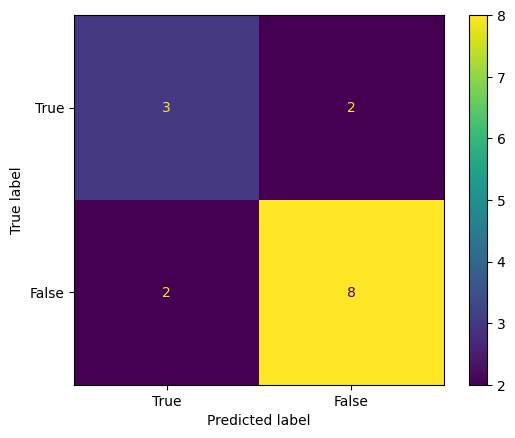

In [ ]:
cm_display.plot()
plt.show()

In [ ]:
conf_matrix

array([[3, 2],
       [2, 8]])

In [ ]:
tp, fn, fp, tn = conf_matrix.ravel()

In [ ]:
conf_matrix.ravel()

array([3, 2, 2, 8])

In [ ]:
TruePositiveRate = tp / (tp + fn)
Precision = tp / (tp + fp)
(TruePositiveRate, Precision)

(0.6, 0.6)

In [ ]:
fpr, tpr, treshold = metrics.roc_curve(Y, winpercent_pred)

In [ ]:
(fpr, tpr, treshold)

(array([0. , 0. , 0. , 0.3, 0.3, 1. ]),
 array([0. , 0.2, 0.6, 0.6, 1. , 1. ]),
 array([1.782184  , 0.782184  , 0.73210344, 0.48637713, 0.36934103,
        0.10914146]))

In [ ]:
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
roc_auc

0.8799999999999999

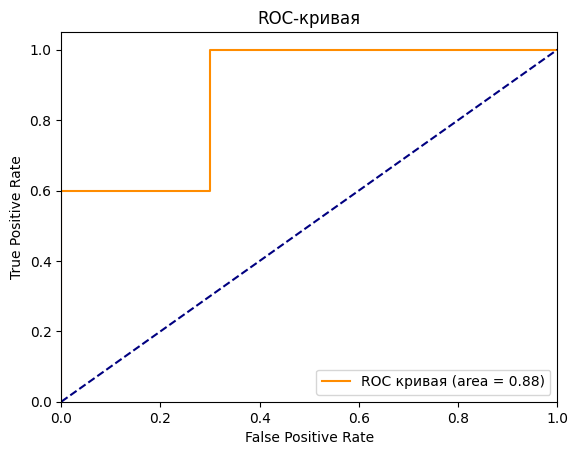

In [ ]:
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

# Задание 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/8baa546c1c38f02f9ef2c11333112e89/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/titanic_train.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,3,1,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,NaN
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,"Co Clare, Ireland Washington, DC"
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,NaN
3,3,0,"Vovk, Mr. Janko",male,22.0,0,0,349252,7.8958,NaN,S,NaN
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S,NaN


In [ ]:
df[df['age'].isnull()].shape

(199, 12)

<Axes: >

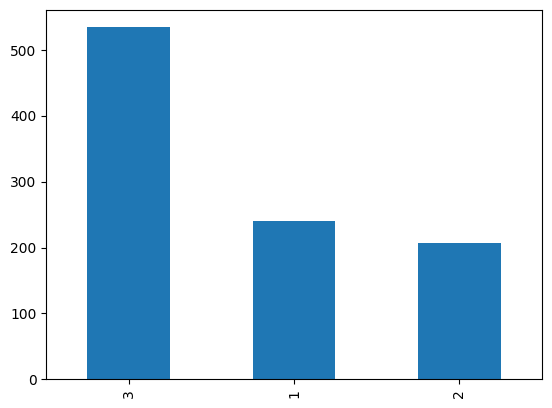

In [ ]:
df['pclass'].value_counts().plot(kind='bar', label='pclass')

In [ ]:
df['survived'][df['survived']==1].count()/df['survived'].count()

0.382262996941896

In [ ]:
for i in df.columns:
  print(i, '\n', df[i][df[i].isnull()].shape[0]/df[i].shape[0])

pclass 
 0.0
survived 
 0.0
name 
 0.0
sex 
 0.0
age 
 0.20285423037716616
sibsp 
 0.0
parch 
 0.0
ticket 
 0.0
fare 
 0.0
cabin 
 0.7838939857288482
embarked 
 0.0
home.dest 
 0.42201834862385323


In [ ]:
to_drop = ['ticket', 'cabin', 'home.dest']

In [ ]:
df = df.drop(to_drop, axis=1)

In [ ]:
df['fam_size'] = df['sibsp'] + df['parch']
df = df.drop(['sibsp', 'parch'], axis=1)
df['fam_size'].mean()

0.8664627930682977

ИСХОДНЫЙ НАБОР ДАННЫХ

In [ ]:
df_init = df.copy()

In [ ]:
df_init

,pclass,survived,name,sex,age,fare,embarked,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,Q,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,Q,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0
...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,8.0500,S,0
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,8.0500,S,0
978,2,0,"Gillespie, Mr. William Henry",male,34.0,13.0000,S,0
979,3,0,"Barton, Mr. David John",male,22.0,8.0500,S,0


In [ ]:
df.head()

,pclass,survived,name,sex,age,fare,embarked,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,Q,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,Q,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0


In [ ]:
df[(df['sex']=='female') & (df['pclass']==1)]['survived'].sum()/df[(df['sex']=='female') & (df['pclass']==1)]['survived'].count()

0.9711538461538461

survived
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: age, dtype: object

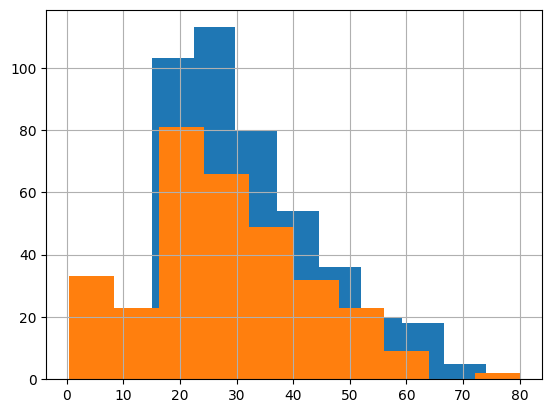

In [ ]:
df.groupby(by='survived')['age'].hist()

## Модель на основе числовых признаков

In [ ]:
df_dropna = df.dropna()

In [ ]:
df_dropna

,pclass,survived,name,sex,age,fare,embarked,fam_size
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0
5,3,1,"Daly, Mr. Eugene Patrick",male,29.0,7.7500,Q,0
7,1,0,"Birnbaum, Mr. Jakob",male,25.0,26.0000,C,0
...,...,...,...,...,...,...,...,...
975,2,0,"Pengelly, Mr. Frederick William",male,19.0,10.5000,S,0
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,8.0500,S,0
978,2,0,"Gillespie, Mr. William Henry",male,34.0,13.0000,S,0
979,3,0,"Barton, Mr. David John",male,22.0,8.0500,S,0


In [ ]:
non_num_cols = ['name', 'sex', 'embarked']
df_non_num = df[non_num_cols]

In [ ]:
df_dropna = df_dropna.drop(non_num_cols, axis=1)

In [ ]:
X = df_dropna.drop('survived', axis=1)
y = df_dropna['survived']

In [ ]:
r_state = 11

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=r_state,
                                                    stratify=y)

In [ ]:
logr = LogisticRegression(random_state=r_state,
                          max_iter=1000)

In [ ]:
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
f1_score(y_test, y_pred)

0.5471698113207547

## Модель с восстановлением пропущенных значений

In [ ]:
df = df.drop(non_num_cols, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    981 non-null    int64  
 1   survived  981 non-null    int64  
 2   age       782 non-null    float64
 3   fare      981 non-null    float64
 4   fam_size  981 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 38.4 KB


In [ ]:
cols_nan = 'age'
nan_avg = df[cols_nan].mean()

df_filled = df.copy()
df_filled.loc[df_filled[cols_nan].isnull(), cols_nan] = nan_avg

In [ ]:
df_filled

,pclass,survived,age,fare,fam_size
0,3,1,29.963448,7.7333,0
1,3,1,29.963448,7.7500,0
2,3,1,38.000000,7.2292,0
3,3,0,22.000000,7.8958,0
4,3,0,16.000000,9.5000,0
...,...,...,...,...,...
976,3,1,29.963448,8.0500,0
977,3,1,19.000000,8.0500,0
978,2,0,34.000000,13.0000,0
979,3,0,22.000000,8.0500,0


In [ ]:
X = df_filled.drop('survived', axis=1)
y = df_filled['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=r_state,
                                                    stratify=y)

In [ ]:
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
f1_score(y_test, y_pred)

0.4297520661157025

## Honorific

In [ ]:
df = df.join(df_non_num)

In [ ]:
df['honorific'] = 0
df['honorific']=df['name'].str.extract('([A-Za-z]+)\.') #lets extract the Salutations
pd.crosstab(df['sex'],df['honorific']).style.background_gradient()

honorific,Capt,Col,Countess,Don,Dona,Dr,Major,Master,Miss,Mlle,Mr,Mrs,Ms,Rev
sex,,,,,,,,,,,,,,
female,0,0,1,0,1,0,0,0,194,2,0,145,2,0
male,1,3,0,1,0,6,1,46,0,0,572,0,0,6


In [ ]:
df['honorific'].\
replace(['Rev', 'Col', 'Dr', 'Major', 'Don', 'Capt', 'Dona', 'Countess', 'Mlle', 'Ms'],\
        ['Mr','Mr','Mr','Mr','Mr','Mr', 'Mrs', 'Mrs', 'Miss', 'Miss'], inplace=True)
pd.crosstab(df['sex'],df['honorific']).style.background_gradient()

honorific,Master,Miss,Mr,Mrs
sex,,,,
female,0,198,0,147
male,46,0,590,0


In [ ]:
df[df['honorific']=='Master']['honorific'].count()/df[df['sex']=='male']['name'].count()

0.07232704402515723

In [ ]:
df[df['honorific']=='Miss']['age'].mean()

22.00576540880503

In [ ]:
honorific_age = df.groupby('honorific')['age'].mean()
honorific_age

honorific
Master     5.128205
Miss      22.005765
Mr        32.900438
Mrs       36.984252
Name: age, dtype: float64

In [ ]:
for h, age in honorific_age.items():
  df.loc[(df['age'].isnull()) & (df['honorific']==h), 'age'] = age

In [ ]:
df

,pclass,survived,age,fare,fam_size,name,sex,embarked,honorific
0,3,1,22.005765,7.7333,0,"Smyth, Miss. Julia",female,Q,Miss
1,3,1,22.005765,7.7500,0,"Glynn, Miss. Mary Agatha",female,Q,Miss
2,3,1,38.000000,7.2292,0,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,C,Mrs
3,3,0,22.000000,7.8958,0,"Vovk, Mr. Janko",male,S,Mr
4,3,0,16.000000,9.5000,0,"de Pelsmaeker, Mr. Alfons",male,S,Mr
...,...,...,...,...,...,...,...,...,...
976,3,1,22.005765,8.0500,0,"Howard, Miss. May Elizabeth",female,S,Miss
977,3,1,19.000000,8.0500,0,"Dorking, Mr. Edward Arthur",male,S,Mr
978,2,0,34.000000,13.0000,0,"Gillespie, Mr. William Henry",male,S,Mr
979,3,0,22.000000,8.0500,0,"Barton, Mr. David John",male,S,Mr


In [ ]:
non_num_cols.append('honorific')

In [ ]:
df = df.drop(non_num_cols, axis=1)
df.head()

,pclass,survived,age,fare,fam_size
0,3,1,22.005765,7.7333,0
1,3,1,22.005765,7.7500,0
2,3,1,38.000000,7.2292,0
3,3,0,22.000000,7.8958,0
4,3,0,16.000000,9.5000,0


In [ ]:
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=r_state,
                                                    stratify=y)

In [ ]:
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
f1_score(y_test, y_pred)

0.43902439024390244

## One hot

In [ ]:
df_init.head()

,pclass,survived,name,sex,age,fare,embarked,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,Q,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,Q,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0


In [ ]:
df = df_init.copy()

In [ ]:
df['honorific'] = 0
df['honorific']=df['name'].str.extract('([A-Za-z]+)\.') #lets extract the Salutations
pd.crosstab(df['sex'],df['honorific']).style.background_gradient()

honorific,Capt,Col,Countess,Don,Dona,Dr,Major,Master,Miss,Mlle,Mr,Mrs,Ms,Rev
sex,,,,,,,,,,,,,,
female,0,0,1,0,1,0,0,0,194,2,0,145,2,0
male,1,3,0,1,0,6,1,46,0,0,572,0,0,6


In [ ]:
df['honorific'].\
replace(['Rev', 'Col', 'Dr', 'Major', 'Don', 'Capt', 'Dona', 'Countess', 'Mlle', 'Ms'],\
        ['Mr','Mr','Mr','Mr','Mr','Mr', 'Mrs', 'Mrs', 'Miss', 'Miss'], inplace=True)
pd.crosstab(df['sex'],df['honorific']).style.background_gradient()

honorific,Master,Miss,Mr,Mrs
sex,,,,
female,0,198,0,147
male,46,0,590,0


In [ ]:
honorific_age = df.groupby('honorific')['age'].mean()
honorific_age

honorific
Master     5.128205
Miss      22.005765
Mr        32.900438
Mrs       36.984252
Name: age, dtype: float64

In [ ]:
for h, age in honorific_age.items():
  df.loc[(df['age'].isnull()) & (df['honorific']==h), 'age'] = age

In [ ]:
df = df.drop(['name', 'honorific'], axis=1)

In [ ]:
df

,pclass,survived,sex,age,fare,embarked,fam_size
0,3,1,female,22.005765,7.7333,Q,0
1,3,1,female,22.005765,7.7500,Q,0
2,3,1,female,38.000000,7.2292,C,0
3,3,0,male,22.000000,7.8958,S,0
4,3,0,male,16.000000,9.5000,S,0
...,...,...,...,...,...,...,...
976,3,1,female,22.005765,8.0500,S,0
977,3,1,male,19.000000,8.0500,S,0
978,2,0,male,34.000000,13.0000,S,0
979,3,0,male,22.000000,8.0500,S,0


In [ ]:
non_num_cols = ['sex', 'embarked']

In [ ]:
df = df.join(pd.get_dummies(df[non_num_cols],drop_first=True)).drop(non_num_cols, axis=1)

In [ ]:
df.head()

,pclass,survived,age,fare,fam_size,sex_male,embarked_Q,embarked_S
0,3,1,22.005765,7.7333,0,0,1,0
1,3,1,22.005765,7.7500,0,0,1,0
2,3,1,38.000000,7.2292,0,0,0,0
3,3,0,22.000000,7.8958,0,1,0,1
4,3,0,16.000000,9.5000,0,1,0,1


# Разделение обучение оценка

In [ ]:
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=r_state,
                                                    stratify=y)

In [ ]:
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
f1_score(y_test, y_pred)

0.6575342465753424

# Задание 3

## Обучение

In [ ]:
df = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/8baa546c1c38f02f9ef2c11333112e89/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/titanic_train.csv')

In [ ]:
to_drop = ['ticket', 'cabin', 'home.dest']
df = df.drop(to_drop, axis=1)
df['fam_size'] = df['sibsp'] + df['parch']
df = df.drop(['sibsp', 'parch'], axis=1)

In [ ]:
df['honorific'] = 0
df['honorific']=df['name'].str.extract('([A-Za-z]+)\.') #lets extract the Salutations
pd.crosstab(df['sex'],df['honorific']).style.background_gradient()

honorific,Capt,Col,Countess,Don,Dona,Dr,Major,Master,Miss,Mlle,Mr,Mrs,Ms,Rev
sex,,,,,,,,,,,,,,
female,0,0,1,0,1,0,0,0,194,2,0,145,2,0
male,1,3,0,1,0,6,1,46,0,0,572,0,0,6


In [ ]:
df['honorific'].\
replace(['Rev', 'Col', 'Dr', 'Major', 'Don', 'Capt', 'Dona', 'Countess', 'Mlle', 'Ms'],\
        ['Mr','Mr','Mr','Mr','Mr','Mr', 'Mrs', 'Mrs', 'Miss', 'Miss'], inplace=True)
pd.crosstab(df['sex'],df['honorific']).style.background_gradient()

honorific,Master,Miss,Mr,Mrs
sex,,,,
female,0,198,0,147
male,46,0,590,0


In [ ]:
honorific_age = df.groupby('honorific')['age'].mean()
for h, age in honorific_age.items():
  df.loc[(df['age'].isnull()) & (df['honorific']==h), 'age'] = age
df = df.drop(['name', 'honorific'], axis=1)

In [ ]:
non_num_cols = ['sex', 'embarked']
df = df.join(pd.get_dummies(df[non_num_cols],drop_first=True)).drop(non_num_cols, axis=1)

### MinMax Scaler

In [ ]:
df.head()

,pclass,survived,age,fare,fam_size,sex_male,embarked_Q,embarked_S
0,3,1,22.005765,7.7333,0,0,1,0
1,3,1,22.005765,7.7500,0,0,1,0
2,3,1,38.000000,7.2292,0,0,0,0
3,3,0,22.000000,7.8958,0,1,0,1
4,3,0,16.000000,9.5000,0,1,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = MinMaxScaler().fit(df[['age', 'fam_size', 'fare']])
df[['age', 'fam_size', 'fare']] = scaler.transform(df[['age', 'fam_size', 'fare']])
df

,pclass,survived,age,fare,fam_size,sex_male,embarked_Q,embarked_S
0,3,1,0.272039,0.015094,0.0,0,1,0
1,3,1,0.272039,0.015127,0.0,0,1,0
2,3,1,0.472804,0.014110,0.0,0,0,0
3,3,0,0.271967,0.015412,0.0,1,0,1
4,3,0,0.196653,0.018543,0.0,1,0,1
...,...,...,...,...,...,...,...,...
976,3,1,0.272039,0.015713,0.0,0,0,1
977,3,1,0.234310,0.015713,0.0,1,0,1
978,2,0,0.422594,0.025374,0.0,1,0,1
979,3,0,0.271967,0.015713,0.0,1,0,1


### Разделение обучение

In [ ]:
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    stratify=y)

In [ ]:
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
f1_score(y_test, y_pred)

0.7083333333333334

## Предсказание

In [ ]:
df_test = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/d8ceed85493379b660b9a8a4099615c4/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/titanic_reserved.csv')

In [ ]:
df_test.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN
1,1,"Snyder, Mr. John Pillsbury",male,24.0,1,0,21228,82.2667,B45,S,"Minneapolis, MN"
2,2,"Ashby, Mr. John",male,57.0,0,0,244346,13.0000,NaN,S,"West Hoboken, NJ"
3,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S,NaN
4,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S,Southampton


### Заполнение пропусков

In [ ]:
df_test = df_test.drop(['cabin', 'ticket', 'home.dest'], axis=1)

### Honorific

In [ ]:
df_test['honorific'] = 0
df_test['honorific']=df_test['name'].str.extract('([A-Za-z]+)\.') #lets extract the Salutations
pd.crosstab(df_test['sex'],df_test['honorific']).style.background_gradient()

honorific,Col,Dr,Jonkheer,Lady,Major,Master,Miss,Mme,Mr,Mrs,Rev,Sir
sex,,,,,,,,,,,,
female,0,1,0,1,0,0,66,1,0,52,0,0
male,1,1,1,0,1,15,0,0,185,0,2,1


In [ ]:
df_test['honorific'].\
replace(['Jonkheer', 'Sir', 'Rev', 'Col', 'Dr', 'Major', 'Don', 'Capt', 'Dona', 'Lady', 'Countess', 'Mlle', 'Ms', 'Mme'],\
        ['Mr', 'Mr', 'Mr','Mr','Mr','Mr','Mr','Mr', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Miss'], inplace=True)
pd.crosstab(df_test['sex'],df_test['honorific']).style.background_gradient()

honorific,Master,Miss,Mr,Mrs
sex,,,,
female,0,67,1,53
male,15,0,192,0


In [ ]:
honorific_age = df_test.groupby('honorific')['age'].mean()
honorific_age

honorific
Master     6.470236
Miss      21.339395
Mr        32.536913
Mrs       37.217391
Name: age, dtype: float64

In [ ]:
for h, age in honorific_age.items():
  df_test.loc[(df_test['age'].isnull()) & (df_test['honorific']==h), 'age'] = age

In [ ]:
df_test = df_test.drop(['name', 'honorific'], axis=1)

In [ ]:
df_test['fam_size'] = df_test['sibsp'] + df_test['parch']

In [ ]:
df_test = df_test.drop(['parch', 'sibsp'], axis=1)

In [ ]:
df_test

,pclass,sex,age,fare,embarked,fam_size
0,3,male,32.536913,69.5500,S,10
1,1,male,24.000000,82.2667,S,1
2,2,male,57.000000,13.0000,S,0
3,3,male,18.000000,20.2125,S,2
4,2,female,18.000000,23.0000,S,1
...,...,...,...,...,...,...
323,1,male,32.536913,39.6000,C,0
324,1,male,45.000000,26.5500,S,0
325,1,female,37.217391,82.1708,C,1
326,2,male,0.833300,29.0000,S,2


### One hot

In [ ]:
non_num_cols = ['sex', 'embarked']

In [ ]:
df_test = df_test.join(pd.get_dummies(df_test[non_num_cols], drop_first=True)).drop(non_num_cols, axis=1)

### MinMaxScaler

In [ ]:
df_test[['age', 'fam_size', 'fare']] = scaler.transform(df_test[['age', 'fam_size', 'fare']])
df_test

,pclass,age,fare,fam_size,sex_male,embarked_Q,embarked_S
0,3,0.404229,0.135753,1.0,1,0,1
1,1,0.297071,0.160574,0.1,1,0,1
2,2,0.711297,0.025374,0.0,1,0,1
3,3,0.221758,0.039452,0.2,1,0,1
4,2,0.221758,0.044893,0.1,0,0,1
...,...,...,...,...,...,...,...
323,1,0.404229,0.077294,0.0,1,0,0
324,1,0.560670,0.051822,0.0,1,0,1
325,1,0.462980,0.160387,0.1,0,0,0
326,2,0.006276,0.056604,0.2,1,0,1


## Предсказание

In [ ]:
y_pred = logr.predict(df_test)

In [ ]:
y_pred = pd.DataFrame(y_pred)

In [ ]:
y_pred.transpose().to_csv(r'/content/predict.csv', index= False)